# Config

In [1]:
import warnings; warnings.filterwarnings('ignore')

In [2]:
list_features_name = ['AvgUnitPrice', 'SumQuantity', 'AvgQuantityPerInvoice', 'AvgQuantityPerProduct', 'AvgProductPerInvoice']
all_target_name = ['NumProduct', 'TotalPrice', 'AvgPricePerInvoice']
cusseg_target = ['AvgPricePerInvoice', 'TotalPrice']

In [3]:
StatFeature_Define = [ {'key':'CustomerID', 'data':'InvoiceNo', 'agg_metric':'count', 'value_name':'NumInvoice'},\
{'key':'CustomerID', 'data':'StockCode', 'agg_metric':'count', 'value_name':'NumProduct'}, \
{'key':'CustomerID', 'data':'TotalPrice', 'agg_metric':'sum', 'value_name':'TotalPrice'}, \
{'key':'CustomerID', 'data':'Quantity', 'agg_metric':'sum', 'value_name':'SumQuantity'}, \
{'key':'CustomerID', 'data':'UnitPrice', 'agg_metric':'mean', 'value_name':'AvgUnitPrice'}, \
{'key':'CustomerID', 'data':'Quantity', 'agg_metric':'mean', 'value_name':'AvgQuantityPerProduct'}, \
]
HighLevelFeature_Define = [
{'key1':'CustomerID', 'key2':'InvoiceNo', 'data':'TotalPrice', 'agg_metric_1':'mean', 'agg_metric_2':'sum', 'value_name':'AvgPricePerInvoice'}, \
{'key1':'CustomerID', 'key2':'InvoiceNo', 'data':'Quantity', 'agg_metric_1':'mean', 'agg_metric_2':'sum', 'value_name':'AvgQuantityPerInvoice'}, \
{'key1':'CustomerID', 'key2':'InvoiceNo', 'data':'StockCode', 'agg_metric_1':'mean', 'agg_metric_2':'count', 'value_name':'AvgProductPerInvoice'}]

# import

In [4]:
import numpy as np
import pandas as pd

In [6]:
from segment.exp_save.read_data import prepare_fulldata, prepare_monthlydata

# run

In [7]:
list_features_name = ['AvgUnitPrice', 'SumQuantity', 'AvgQuantityPerInvoice', 'AvgQuantityPerProduct', 'AvgProductPerInvoice']
all_target_name = ['NumProduct', 'TotalPrice', 'AvgPricePerInvoice']
cusseg_target = ['AvgPricePerInvoice', 'TotalPrice']

StatFeature_Define = [ {'key':'CustomerID', 'data':'InvoiceNo', 'agg_metric':'count', 'value_name':'NumInvoice'},\
{'key':'CustomerID', 'data':'StockCode', 'agg_metric':'count', 'value_name':'NumProduct'}, \
{'key':'CustomerID', 'data':'TotalPrice', 'agg_metric':'sum', 'value_name':'TotalPrice'}, \
{'key':'CustomerID', 'data':'Quantity', 'agg_metric':'sum', 'value_name':'SumQuantity'}, \
{'key':'CustomerID', 'data':'UnitPrice', 'agg_metric':'mean', 'value_name':'AvgUnitPrice'}, \
{'key':'CustomerID', 'data':'Quantity', 'agg_metric':'mean', 'value_name':'AvgQuantityPerProduct'}, \
]
HighLevelFeature_Define = [
{'key1':'CustomerID', 'key2':'InvoiceNo', 'data':'TotalPrice', 'agg_metric_1':'mean', 'agg_metric_2':'sum', 'value_name':'AvgPricePerInvoice'}, \
{'key1':'CustomerID', 'key2':'InvoiceNo', 'data':'Quantity', 'agg_metric_1':'mean', 'agg_metric_2':'sum', 'value_name':'AvgQuantityPerInvoice'}, \
{'key1':'CustomerID', 'key2':'InvoiceNo', 'data':'StockCode', 'agg_metric_1':'mean', 'agg_metric_2':'count', 'value_name':'AvgProductPerInvoice'}]

In [8]:
# full_data = prepare_fulldata()
# full_data.head()

In [9]:
# monthly_data = prepare_monthlydata(full_data, date_col = 'InvoiceDate',month_select = '2011-11')
# df = generate_features(monthly_data, user_key='CustomerID', StatFeature_Define=StatFeature_Define, HighLevelFeature_Define=HighLevelFeature_Define)
# df.head()

In [10]:
# df.to_csv('exp_save/traindata.csv', index = False)

In [12]:
df = pd.read_csv('segment/exp_save/traindata.csv')

In [13]:
from model import FeatureImpact
fi_obj = FeatureImpact()
TP_feature_impacts = fi_obj.cal_featureimpact(df, 'TotalPrice', ['SumQuantity'])
fi_obj.parsing_featureimpact(TP_feature_impacts)

,Target,Feature,Summary_Metric,Impact
0,TotalPrice,SumQuantity,max,0.750107
1,TotalPrice,SumQuantity,mean,0.678072
2,TotalPrice,SumQuantity,delta_prob,0.170139
3,TotalPrice,SumQuantity,delta_cor_local,0.165694
4,TotalPrice,SumQuantity,delta_cor,0.148210


## Baseline

For n_clusters = 9 the average silhouette score is : 0.2480


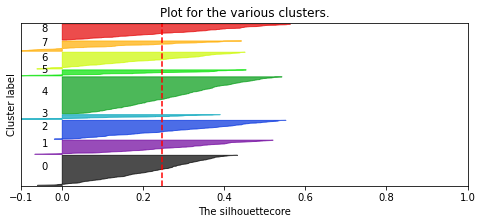

4    399
0    326
2    204
6    181
8    171
1    154
7    112
5     65
3     52
Name: Base_Cluster, dtype: int64


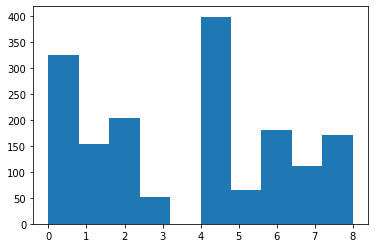

In [16]:
from model import compute_clusters, visualize_clusters
basecluster_df = pd.DataFrame()
basecluster_df['Base_Cluster'] = compute_clusters(np.log(df[list_features_name]), type_model = "kmeans", num_clusters=9)
cluster_sizes, silhouette_score = visualize_clusters(np.log(df[list_features_name]), basecluster_df['Base_Cluster'], pair_plot = False, visualize_tsne = False, visualize_pca = False)

## Test

In [17]:
url = 'segment/exp_save/weights.pkl'
def test(path_name_model = url, path_to_save = ''):
    from segment.Generic_Segment.Segment_Analytics import Segment_Analytics
    seg_ana = Segment_Analytics(df, all_target_name, list_features_name, cusseg_target, \
                                custom_settings = {'num_clusters': 9, 'fluct_range':0.05, 'path_name_model':path_name_model, 'log_mode':True})

    all_matrix_distance, all_clusters, all_centers, all_models = seg_ana.generate_CustomCluster()
    seg_ana.visualize_CustomSeg()
    seg_ana.visualize_matrixcluster_CustomSeg()

    gen_clusters, all_ClusterValues = seg_ana.generate_GenericSegment()
    seg_ana.visualize_GenericSegment()
    seg_ana.visualize_matrixcluster_GenericSeg()
    return seg_ana.save_segments(df['CustomerID'], path_to_save), seg_ana

* Find centroids for each group of the target
    + Train input for group  [0.1598326]
        . Epoch 0: Loss = 0.035213
        . Epoch 19: Loss = 0.031635
        . Epoch 39: Loss = 0.028078
        . Epoch 59: Loss = 0.024704
        . Epoch 79: Loss = 0.021543
        . Epoch 99: Loss = 0.018636
        . Epoch 0: Loss = 0.035999
        . Epoch 19: Loss = 0.032327
        . Epoch 39: Loss = 0.028694
        . Epoch 59: Loss = 0.025268
        . Epoch 79: Loss = 0.022082
        . Epoch 99: Loss = 0.019169
        . Epoch 0: Loss = 0.035127
        . Epoch 19: Loss = 0.031512
        . Epoch 39: Loss = 0.027931
        . Epoch 59: Loss = 0.024559
        . Epoch 79: Loss = 0.021424
        . Epoch 99: Loss = 0.018550
        . Epoch 0: Loss = 0.033141
        . Epoch 19: Loss = 0.029735
        . Epoch 39: Loss = 0.026377
        . Epoch 59: Loss = 0.023179
        . Epoch 79: Loss = 0.020184
        . Epoch 99: Loss = 0.017442
        . Epoch 0: Loss = 0.037231
        . Epoch 19

        . Epoch 79: Loss = 1.491871
        . Epoch 99: Loss = 1.441115
        . Epoch 0: Loss = 1.534361
        . Epoch 19: Loss = 1.561780
        . Epoch 39: Loss = 1.565686
        . Epoch 59: Loss = 1.545668
        . Epoch 79: Loss = 1.507067
        . Epoch 99: Loss = 1.455641
        . Epoch 0: Loss = 1.528026
        . Epoch 19: Loss = 1.555009
        . Epoch 39: Loss = 1.558765
        . Epoch 59: Loss = 1.538930
        . Epoch 79: Loss = 1.500713
        . Epoch 99: Loss = 1.449668
* Find centroids for each group of the target
    + Train input for group  [0.11509621]
        . Epoch 0: Loss = 0.057211
        . Epoch 19: Loss = 0.052219
        . Epoch 39: Loss = 0.046801
        . Epoch 59: Loss = 0.041241
        . Epoch 79: Loss = 0.035735
        . Epoch 99: Loss = 0.030465
        . Epoch 0: Loss = 0.058173
        . Epoch 19: Loss = 0.053269
        . Epoch 39: Loss = 0.047890
        . Epoch 59: Loss = 0.042311
        . Epoch 79: Loss = 0.036736
        . Epoch 

        . Epoch 39: Loss = 1.649178
        . Epoch 59: Loss = 1.608699
        . Epoch 79: Loss = 1.548188
        . Epoch 99: Loss = 1.475920
        . Epoch 0: Loss = 1.614751
        . Epoch 19: Loss = 1.635105
        . Epoch 39: Loss = 1.624852
        . Epoch 59: Loss = 1.585822
        . Epoch 79: Loss = 1.526600
        . Epoch 99: Loss = 1.455350
        . Epoch 0: Loss = 1.608575
        . Epoch 19: Loss = 1.630275
        . Epoch 39: Loss = 1.620373
        . Epoch 59: Loss = 1.581195
        . Epoch 79: Loss = 1.521924
        . Epoch 99: Loss = 1.450690
        . Epoch 0: Loss = 1.630203
        . Epoch 19: Loss = 1.650905
        . Epoch 39: Loss = 1.639995
        . Epoch 59: Loss = 1.600073
        . Epoch 79: Loss = 1.540256
        . Epoch 99: Loss = 1.468532
        . Epoch 0: Loss = 1.628628
        . Epoch 19: Loss = 1.649651
        . Epoch 39: Loss = 1.638934
        . Epoch 59: Loss = 1.598757
        . Epoch 79: Loss = 1.538541
        . Epoch 99: Loss = 1.466

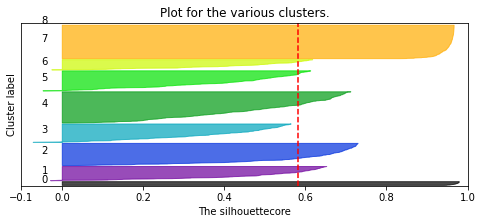

7    362
4    338
2    240
5    217
3    200
1    154
6    111
0     41
8      1
Name: cluster, dtype: int64


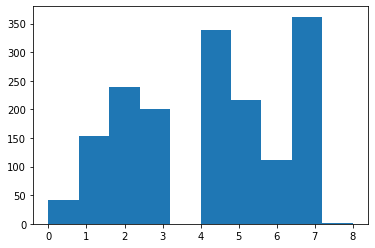

Visualize for  TotalPrice
For n_clusters = 9 the average silhouette score is : 0.5709


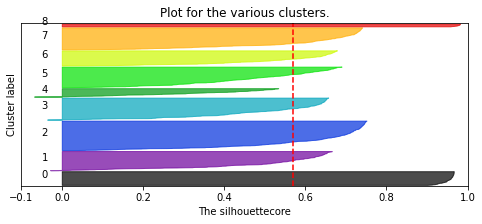

2    319
7    239
3    239
5    223
1    208
6    166
0    149
4     92
8     29
Name: cluster, dtype: int64


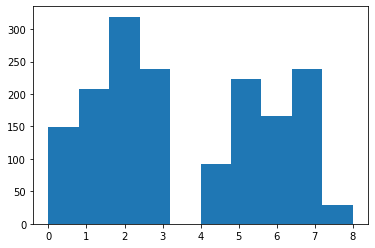

('AvgPricePerInvoice', 'TotalPrice')


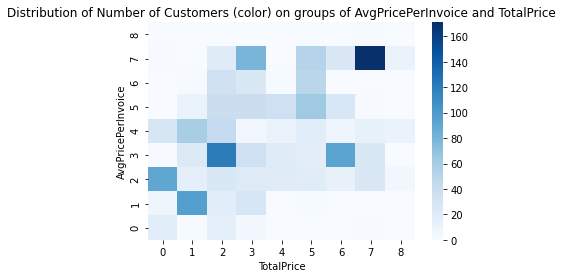

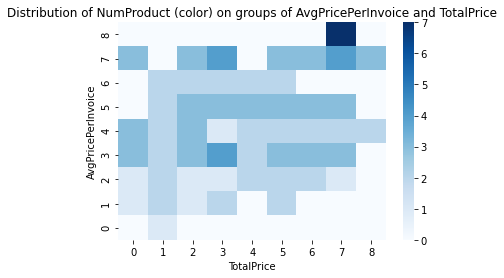

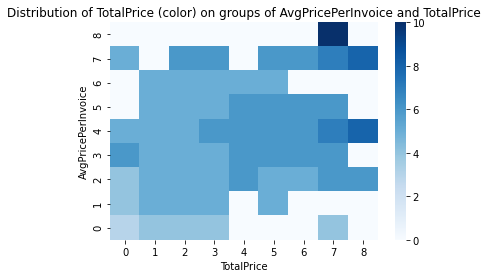

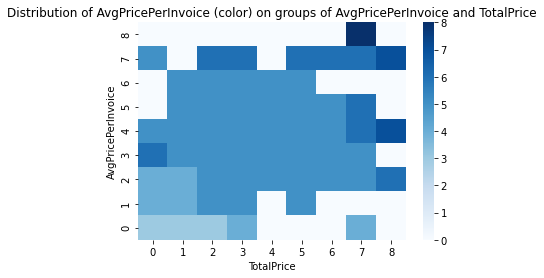

For n_clusters = 9 the average silhouette score is : 0.4864


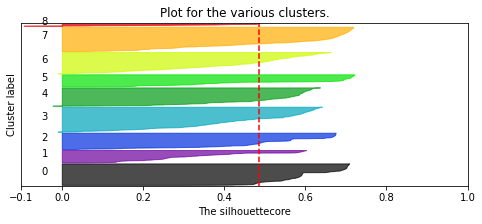

3    271
7    263
0    233
6    231
4    199
2    177
1    135
5    132
8     23
Name: Generic_Cluster, dtype: int64


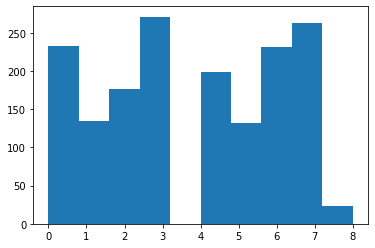

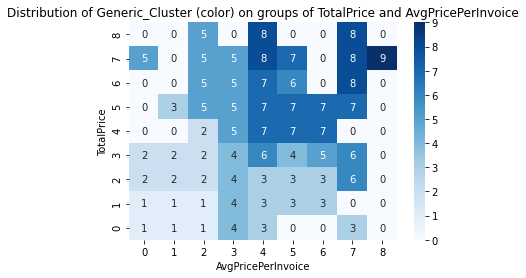

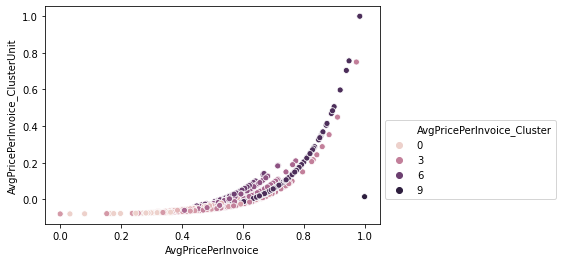

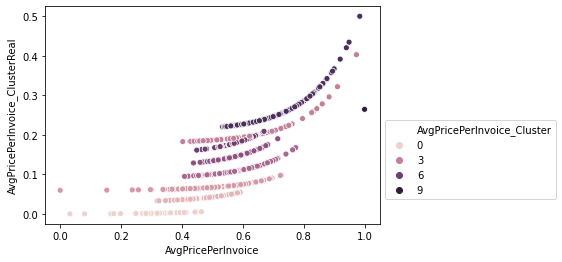

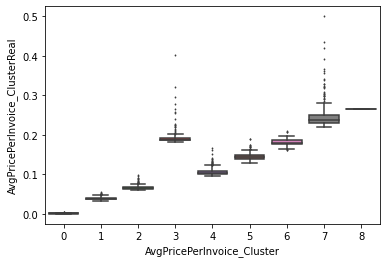

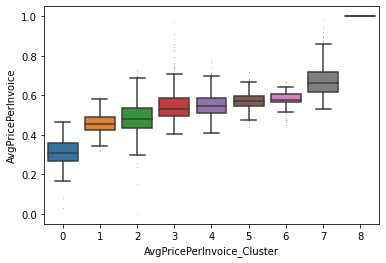

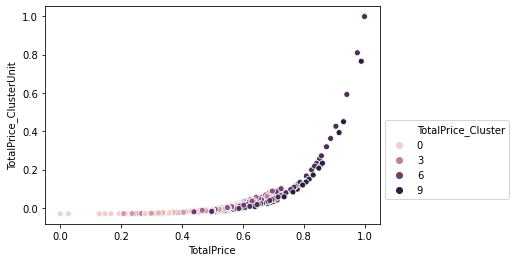

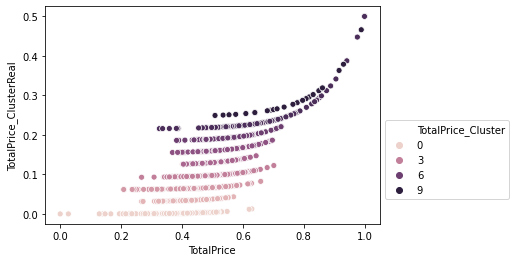

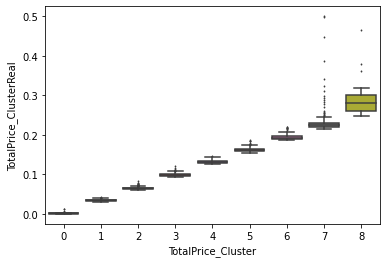

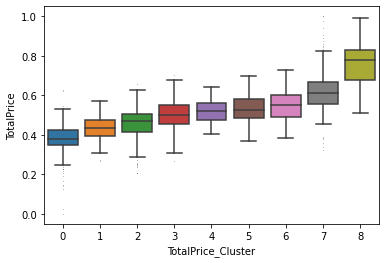

FileNotFoundError: [Errno 2] No such file or directory: 'exp_save/2021_02_17_cluster_df.csv'

In [18]:
regressor, seg_ana = test(path_name_model=url, path_to_save = 'exp_save/2021_02_17_')

# Train a new model

* Find the best regressor!
    + Training regressor with MSELoss()
    Training with minibacth  0
	+ [iteration 0001] Loss: 0.0008, Best loss: 0.0008
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  1
	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  2
	+ [iteration 0001] Loss: 0.0008, Best loss: 0.0008
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  3
	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  4
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0008, Best loss: 0.0008
	+ [iteration 0031] Loss:

	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  3
	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  4
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0008, Best loss: 0.0008
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  6
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  7
	+ [iteration 0001] Loss: 0.0004, Best loss: 0.0004
	+ [iteration 0031] Loss: 0.0004, Best loss: 0.0004
    -> Early stop at epoch 31
    Training with minibacth  8
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iterat

	+ [iteration 0031] Loss: 0.0004, Best loss: 0.0004
    -> Early stop at epoch 31
    Training with minibacth  8
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  9
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  10
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  11
	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  12
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  13
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [it

	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  12
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  13
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  14
	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  15
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  16
	+ [iteration 0001] Loss: 0.0012, Best loss: 0.0012
	+ [iteration 0031] Loss: 0.0012, Best loss: 0.0012
    -> Early stop at epoch 31
    + Training regressor with KLDiv_Loss()
    Training with minibacth  0
	+ [iteration 

	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0042, Best loss: -0.0042
	+ [iteration 0001] Loss: -0.0042, Best loss: -0.0042
    -> Early stop at epoch 1
    Training with minibacth  0
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
    -> Early stop at epoch 1
    Training with minibacth  1
	+ [iteration 0001] Loss: -0.0031, Best loss: -0.0031
	+ [iteration 0001] Loss: -0.0031, Best loss: -0.0031
    -> Early stop at epoch 1
    Training with minibacth  2
	+ [iteration 0001] Loss: -0.0032, Best los

	+ [iteration 0001] Loss: -0.0032, Best loss: -0.0032
	+ [iteration 0001] Loss: -0.0032, Best loss: -0.0032
    -> Early stop at epoch 1
    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0031, Best loss: -0.0031
	+ [iteration 0001] Loss: -0.0031, Best loss: -0.0031
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0033, Best loss: -0.0033
	+ [iteration 0001] Loss: -0.0033, Best loss: -0.0033
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
    -> Early stop at epoch 1
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0045, Best loss: -0.0045
	+ [iteration 0001] Loss: -0.0045, Best loss: -0.0045
    -> Early stop at epoch 1
    Training with minib

    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0076, Best loss: -0.0076
	+ [iteration 0001] Loss: -0.0076, Best loss: -0.0076
    -> Early stop at epoch 1
    Training with minibacth  8
	+ [iteration 0001] Loss: -0.0041, Best loss: -0.0041
	+ [iteration 0001] Loss: -0.0041, Best loss: -0.0041
    -> Early stop at epoch 1
    Training with minibacth  9
	+ [iteration 0001] Loss: -0.0050, Best loss: -0.0050
	+ [iteration 0001] Loss: -0.0050, Best loss: -0.0050
    -> Early stop at epoch 1
    Training with minibacth  10
	+ [iteration 0001] Loss: -0.0048, Best loss: -0.0048
	+ [iteration 0001] Loss: -0.0048, Best loss: -0.0048
    -> Early stop at epoch 1
    Training with minibacth  11
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
	+ [iteration 0001] Loss: -0.0035, Best los

	+ [iteration 0001] Loss: -0.0048, Best loss: -0.0048
	+ [iteration 0001] Loss: -0.0048, Best loss: -0.0048
    -> Early stop at epoch 1
    Training with minibacth  11
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
    -> Early stop at epoch 1
    Training with 

	+ [iteration 0001] Loss: -0.0048, Best loss: -0.0048
    -> Early stop at epoch 1
    Training with minibacth  11
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0035, Best 

	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0044, Best loss: -0.0044
	+ [iteration 0001] Loss: -0.0044, Best loss: -0.0044
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0057, Best loss: -0.0057
	+ [iteration 0001] Loss: -0.0057, Best loss: -0.0057
    -> Early stop at epoch 1
    Training with minibacth  0
	+ [iteration 0001] Loss: -0.0042, Best loss: -0.0042
	+ [iteration 0001] Loss: -0.0042, Best loss: -0.0042
    -> Early stop at epoch 1
    Training with minibacth  1
	+ [iteration 0001] Loss: -0.0039, Best lo

	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0044, Best loss: -0.0044
	+ [iteration 0001] Loss: -0.0044, Best loss: -0.0044
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0057, Best loss: -0.0057
	+ [iteration 0001] Loss: -0.0057, Best loss: -0.0057
    -> Early stop at epoch 1
    Training with minibacth  0
	+ [iteration 0001] Loss: -0.0042, Best loss: -0.0042
	+ [iteration 0001] Loss: -0.0042, Best loss: -0.0042
    -> Early stop at epoch 1
    Training with minibacth  1
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
    -> Early stop at epoch 1
    Training with minibacth  2
	+ [iteration 0001] Loss: -0.0040, Best los

	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
    -> Early stop at epoch 1
    Training with minibacth  0
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
    -> Early stop at epoch 1
    Training with minibacth  1
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
    -> Early stop at epoch 1
    Training with minibacth  2
	+ [iteration 0001] Loss: -0.0024, Best loss: -0.0024
	+ [iteration 0001] Loss: -0.0024, Best loss: -0.0024
    -> Early stop at epoch 1
    Training with min

	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
    -> Early stop at epoch 1
    Training with minibacth  11
	+ [iteration 0001] Loss: -0.0019, Best loss: -0.0019
	+ [iteration 0001] Loss: -0.0019, Best loss: -0.0019
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0030, Best 

	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
    -> Early stop at epoch 1
    Training with minibacth  10
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
    -> Early stop at epoch 1
    Training with minibacth  11
	+ [iteration 0001] Loss: -0.0019, Best loss: -0.0019
	+ [iteration 0001] Loss: -0.0019, Best loss: -0.0019
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
    -> Early stop at epoch 1
    Training with 

	+ [iteration 0060] Loss: 0.0001, Best loss: 0.0001
	+ [iteration 0062] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 62
    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: 0.0002, Best loss: 0.0002
	+ [iteration 0006] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 6
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0025] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 25
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0017, Best loss: -0.0017
	+ [iteration 0001] Loss: -0.0017, Best loss: -0.0017
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0074, Best loss: -0.0074
	+ [iteration 0001] Loss: -0.0074, Best loss: -0.0074
    -> Early stop at epoch 1
    Training with minibacth

	+ [iteration 0060] Loss: 0.0001, Best loss: 0.0001
	+ [iteration 0062] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 62
    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: 0.0002, Best loss: 0.0002
	+ [iteration 0006] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 6
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0025] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 25
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0017, Best loss: -0.0017
	+ [iteration 0001] Loss: -0.0017, Best loss: -0.0017
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0074, Best loss: -0.0074
	+ [iteration 0001] Loss: -0.0074, Best loss: -0.0074
    -> Early stop at epoch 1
    Training with minibacth

	+ [iteration 0001] Loss: 0.0028, Best loss: 0.0028
	+ [iteration 0031] Loss: 0.0025, Best loss: 0.0025
    -> Early stop at epoch 31
    Training with minibacth  1
	+ [iteration 0001] Loss: 0.0022, Best loss: 0.0022
	+ [iteration 0031] Loss: 0.0018, Best loss: 0.0018
    -> Early stop at epoch 31
    Training with minibacth  2
	+ [iteration 0001] Loss: 0.0017, Best loss: 0.0017
	+ [iteration 0060] Loss: 0.0001, Best loss: 0.0001
	+ [iteration 0062] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 62
    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: 0.0002, Best loss: 0.0002
	+ [iteration 0006] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 6
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0025] Loss: -0.0000, Best loss: -0.0000
    -> Earl

        . Epoch 19: Loss = 0.093601
        . Epoch 39: Loss = 0.088553
        . Epoch 59: Loss = 0.079852
        . Epoch 79: Loss = 0.068881
        . Epoch 99: Loss = 0.057117
        . Epoch 0: Loss = 0.094277
        . Epoch 19: Loss = 0.094960
        . Epoch 39: Loss = 0.090776
        . Epoch 59: Loss = 0.082009
        . Epoch 79: Loss = 0.070526
        . Epoch 99: Loss = 0.058087
        . Epoch 0: Loss = 0.100224
        . Epoch 19: Loss = 0.099621
        . Epoch 39: Loss = 0.093900
        . Epoch 59: Loss = 0.083770
        . Epoch 79: Loss = 0.071396
        . Epoch 99: Loss = 0.058577
    + Train input for group  [0.8286997]
        . Epoch 0: Loss = 0.404775
        . Epoch 19: Loss = 0.432822
        . Epoch 39: Loss = 0.432756
        . Epoch 59: Loss = 0.408086
        . Epoch 79: Loss = 0.367786
        . Epoch 99: Loss = 0.319280
        . Epoch 0: Loss = 0.417870
        . Epoch 19: Loss = 0.446891
        . Epoch 39: Loss = 0.446545
        . Epoch 59: Loss = 

	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0008, Best loss: 0.0008
	+ [iteration 0031] Loss: 0.0008, Best loss: 0.0008
    -> Early stop at epoch 31
    Training with minibacth  6
	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  7
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  8
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  9
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  10
	+ [itera

	+ [iteration 0001] Loss: 0.0007, Best loss: 0.0007
	+ [iteration 0031] Loss: 0.0007, Best loss: 0.0007
    -> Early stop at epoch 31
    Training with minibacth  7
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  8
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  9
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  10
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  11
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  12
	+ [ite

    -> Early stop at epoch 31
    Training with minibacth  9
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  10
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  11
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -> Early stop at epoch 31
    Training with minibacth  12
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  13
	+ [iteration 0001] Loss: 0.0005, Best loss: 0.0005
	+ [iteration 0031] Loss: 0.0005, Best loss: 0.0005
    -> Early stop at epoch 31
    Training with minibacth  14
	+ [iteration 0001] Loss: 0.0006, Best loss: 0.0006
	+ [iteration 0031] Loss: 0.0006, Best loss: 0.0006
    -

	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  8
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
    -> Early stop at epoch 1
    Training with minibacth  9
	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
    -> Early stop at epoch 1
    Training with minibacth  10
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  11
	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
    -> Early stop at epoch 1
    Training with mi

	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
	+ [iteration 0001] Loss: -0.0028, Best loss: -0.0028
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
	+ [iteration 0001] Loss: -0.0027, Best loss: -0.0027
    -> Early stop at epoch 1
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  8
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
	+ [iteration 0001] Loss: -0.0030, Best loss: -0.0030
    -> Early stop at epoch 1
    Training with minib

	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
	+ [iteration 0001] Loss: -0.0025, Best loss: -0.0025
    -> Early stop at epoch 1
    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0032, Best loss: -0.0032
	+ [iteration 0001] Loss: -0.0032, Best loss: -0.0032
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
    -> Early stop at epoch 1
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
    -> Early stop at epoch 1
    Training with minib

    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0032, Best loss: -0.0032
	+ [iteration 0001] Loss: -0.0032, Best loss: -0.0032
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
    -> Early stop at epoch 1
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
	+ [iteration 0001] Loss: -0.0034, Best loss: -0.0034
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
    -> Early stop at epoch 1
    Training with minibacth  8
	+ [iteration 0001] Loss: -0.0041, Best loss: -0.0041
	+ [iteration 0001] Loss: -0.0041, Best loss: -0.0041
    -> Early stop at 

	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0043, Best loss: -0.0043
	+ [iteration 0001] Loss: -0.0043, Best loss: -0.0043
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0045, Best loss: -0.0045
	+ [iteration 0001] Loss: -0.0045, Best loss: -0.0045
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0066, Best loss: -0.0066
	+ [iteration 0001] Loss: -0.0066, Best loss: -0.0066
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0053, Best loss: -0.0053
	+ [iteration 0001] Loss: -0.0053, Best loss: -0.0053
    -> Early stop at epoch 1
    + Training reg

	+ [iteration 0001] Loss: -0.0035, Best loss: -0.0035
    -> Early stop at epoch 1
    Training with minibacth  2
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
    -> Early stop at epoch 1
    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
	+ [iteration 0001] Loss: -0.0037, Best loss: -0.0037
    -> Early stop at epoch 1
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0044, Best loss: 

	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
	+ [iteration 0001] Loss: -0.0038, Best loss: -0.0038
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
    -> Early stop at epoch 1
    Training with minibacth  16
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
	+ [iteration 0001] Loss: -0.0059, Best loss: -0.0059
    -> Early stop at epoch 1
    Training with minibacth  0
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
	+ [iteration 0001] Loss: -0.0039, Best loss: -0.0039
    -> Early stop at epoch 1
    Training with minibacth  1
	+ [iteration 0001] Loss: -0.0035, Best lo

	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
    -> Early stop at epoch 1
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
    -> Early stop at epoch 1
    Training with minibacth  8
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
    -> Early stop at epoch 1
    Training with minib

	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
	+ [iteration 0001] Loss: -0.0029, Best loss: -0.0029
    -> Early stop at epoch 1
    Training with minibacth  11
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
    -> Early stop at epoch 1
    Training with minibacth  12
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
    -> Early stop at epoch 1
    Training with minibacth  13
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
	+ [iteration 0001] Loss: -0.0023, Best loss: -0.0023
    -> Early stop at epoch 1
    Training with minibacth  14
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
    -> Early stop at epoch 1
    Training with minibacth  15
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
	+ [iteration 0001] Loss: -0.0026, Best loss: -0.0026
    -> Early stop at epoch 1
    Training with 

	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
	+ [iteration 0001] Loss: -0.0022, Best loss: -0.0022
    -> Early stop at epoch 1
    Training with minibacth  1
	+ [iteration 0001] Loss: -0.0018, Best loss: -0.0018
	+ [iteration 0001] Loss: -0.0018, Best loss: -0.0018
    -> Early stop at epoch 1
    Training with minibacth  2
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
    -> Early stop at epoch 1
    Training with minibacth  3
	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
    -> Early stop at epoch 1
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
	+ [iteration 0001] Loss: -0.0021, Best loss: -0.0021
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
	+ [iteration 0001] Loss: -0.0020, Best loss: -0.0020
    -> Early stop at epoch 1
    Training with minib

	+ [iteration 0031] Loss: 0.0018, Best loss: 0.0018
    -> Early stop at epoch 31
    Training with minibacth  1
	+ [iteration 0001] Loss: 0.0015, Best loss: 0.0015
	+ [iteration 0031] Loss: 0.0014, Best loss: 0.0014
    -> Early stop at epoch 31
    Training with minibacth  2
	+ [iteration 0001] Loss: 0.0015, Best loss: 0.0015
	+ [iteration 0031] Loss: 0.0013, Best loss: 0.0013
    -> Early stop at epoch 31
    Training with minibacth  3
	+ [iteration 0001] Loss: 0.0013, Best loss: 0.0013
	+ [iteration 0051] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 51
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0001, Best loss: 0.0001
	+ [iteration 0004] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 4
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0008, Best loss: -0.0008
	+

	+ [iteration 0031] Loss: 0.0018, Best loss: 0.0018
    -> Early stop at epoch 31
    Training with minibacth  1
	+ [iteration 0001] Loss: 0.0015, Best loss: 0.0015
	+ [iteration 0031] Loss: 0.0014, Best loss: 0.0014
    -> Early stop at epoch 31
    Training with minibacth  2
	+ [iteration 0001] Loss: 0.0015, Best loss: 0.0015
	+ [iteration 0031] Loss: 0.0013, Best loss: 0.0013
    -> Early stop at epoch 31
    Training with minibacth  3
	+ [iteration 0001] Loss: 0.0013, Best loss: 0.0013
	+ [iteration 0051] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 51
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0001, Best loss: 0.0001
	+ [iteration 0004] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 4
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0008, Best loss: -0.0008
	+

	+ [iteration 0031] Loss: 0.0014, Best loss: 0.0014
    -> Early stop at epoch 31
    Training with minibacth  2
	+ [iteration 0001] Loss: 0.0015, Best loss: 0.0015
	+ [iteration 0031] Loss: 0.0013, Best loss: 0.0013
    -> Early stop at epoch 31
    Training with minibacth  3
	+ [iteration 0001] Loss: 0.0013, Best loss: 0.0013
	+ [iteration 0051] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 51
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0001, Best loss: 0.0001
	+ [iteration 0004] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 4
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0008, Best loss: -0.0008
	+ [iteration 0001] Loss: -0.0008, Best loss: -0.0008
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0057, Best loss: -0.0057

	+ [iteration 0031] Loss: 0.0014, Best loss: 0.0014
    -> Early stop at epoch 31
    Training with minibacth  2
	+ [iteration 0001] Loss: 0.0015, Best loss: 0.0015
	+ [iteration 0031] Loss: 0.0013, Best loss: 0.0013
    -> Early stop at epoch 31
    Training with minibacth  3
	+ [iteration 0001] Loss: 0.0013, Best loss: 0.0013
	+ [iteration 0051] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 51
    Training with minibacth  4
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
	+ [iteration 0001] Loss: -0.0001, Best loss: -0.0001
    -> Early stop at epoch 1
    Training with minibacth  5
	+ [iteration 0001] Loss: 0.0001, Best loss: 0.0001
	+ [iteration 0004] Loss: -0.0000, Best loss: -0.0000
    -> Early stop at epoch 4
    Training with minibacth  6
	+ [iteration 0001] Loss: -0.0008, Best loss: -0.0008
	+ [iteration 0001] Loss: -0.0008, Best loss: -0.0008
    -> Early stop at epoch 1
    Training with minibacth  7
	+ [iteration 0001] Loss: -0.0057, Best loss: -0.0057

        . Epoch 99: Loss = 0.052797
        . Epoch 0: Loss = 0.095221
        . Epoch 19: Loss = 0.092183
        . Epoch 39: Loss = 0.085214
        . Epoch 59: Loss = 0.075080
        . Epoch 79: Loss = 0.063476
        . Epoch 99: Loss = 0.051779
    + Train input for group  [0.82863915]
        . Epoch 0: Loss = 0.423772
        . Epoch 19: Loss = 0.453051
        . Epoch 39: Loss = 0.453163
        . Epoch 59: Loss = 0.427363
        . Epoch 79: Loss = 0.384930
        . Epoch 99: Loss = 0.334012
        . Epoch 0: Loss = 0.415194
        . Epoch 19: Loss = 0.444761
        . Epoch 39: Loss = 0.445848
        . Epoch 59: Loss = 0.420915
        . Epoch 79: Loss = 0.379309
        . Epoch 99: Loss = 0.329074
        . Epoch 0: Loss = 0.432929
        . Epoch 19: Loss = 0.461320
        . Epoch 39: Loss = 0.460358
        . Epoch 59: Loss = 0.433808
        . Epoch 79: Loss = 0.391144
        . Epoch 99: Loss = 0.340256
        . Epoch 0: Loss = 0.419449
        . Epoch 19: Loss = 

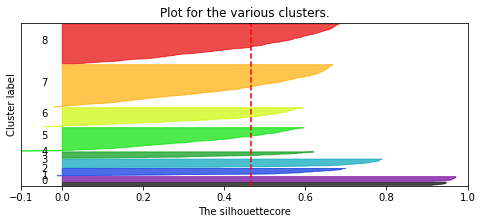

7    455
8    428
5    252
6    206
3     91
2     79
4     68
1     51
0     34
Name: cluster, dtype: int64


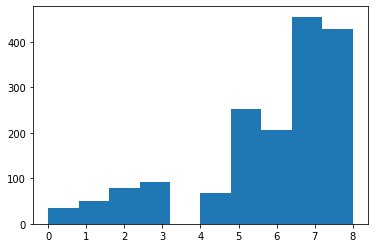

Visualize for  TotalPrice
For n_clusters = 9 the average silhouette score is : 0.4799


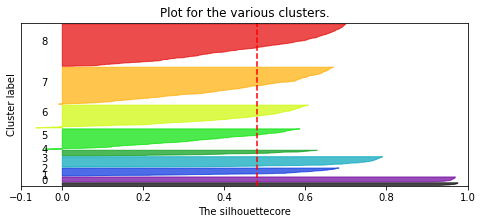

8    455
7    400
6    247
5    221
3    113
2     86
4     60
1     53
0     29
Name: cluster, dtype: int64


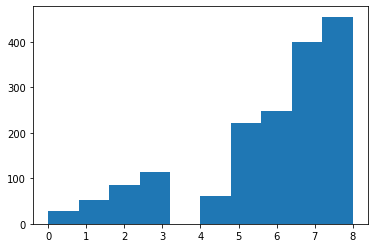

('AvgPricePerInvoice', 'TotalPrice')


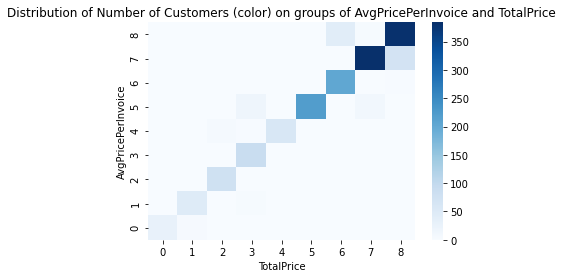

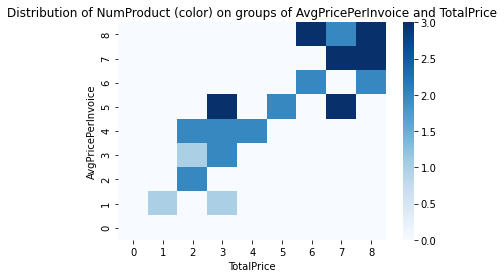

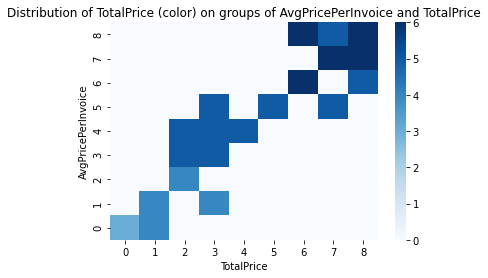

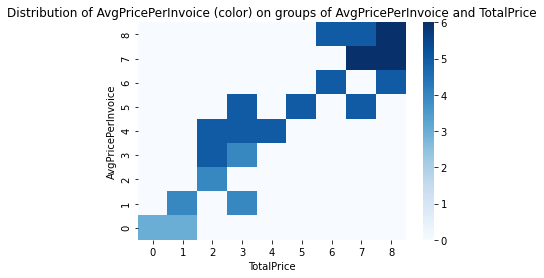

For n_clusters = 9 the average silhouette score is : 0.5479


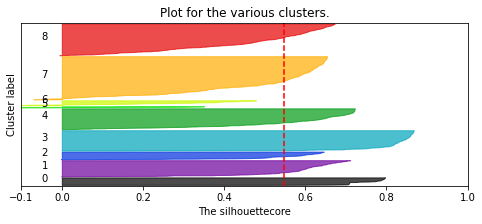

7    467
8    341
4    227
3    221
1    176
2     83
0     82
6     55
5     12
Name: Generic_Cluster, dtype: int64


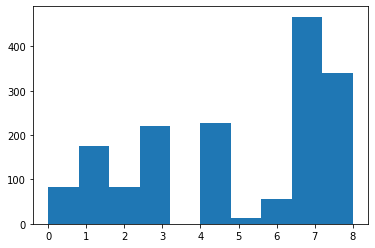

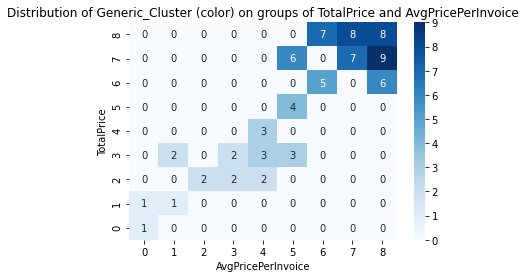

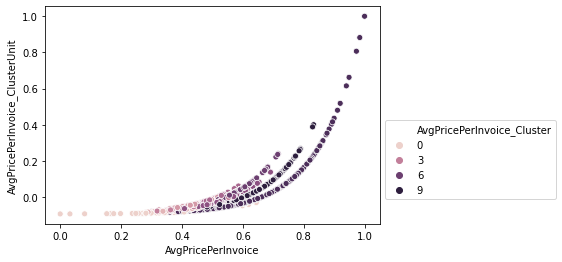

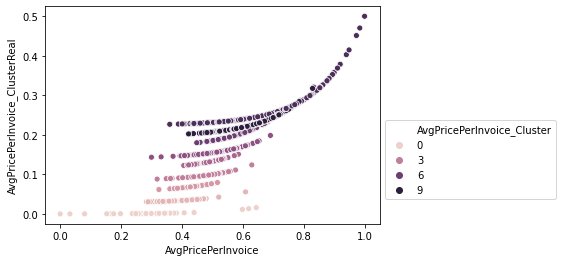

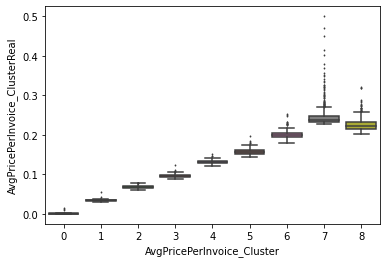

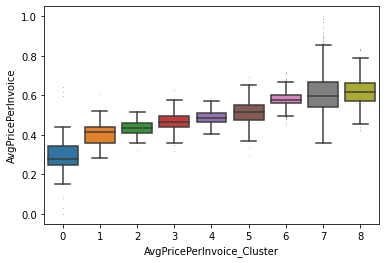

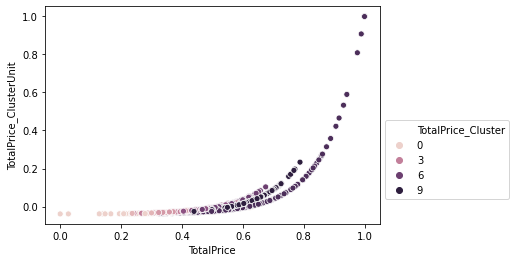

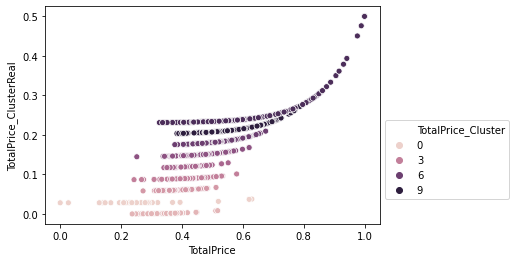

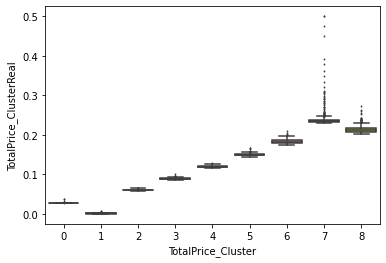

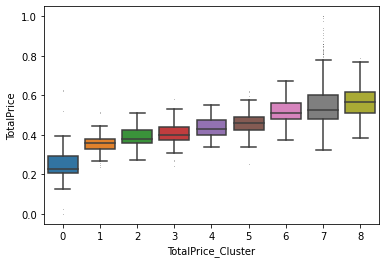

FileNotFoundError: [Errno 2] No such file or directory: 'exp_save/2021_02_18_cluster_df.csv'

In [19]:
regressor, seg_ana = test(path_name_model=None, path_to_save = 'exp_save/2021_02_18_')

* Find the best regressor!
    + Training regressor with MSELoss()
	+ [iteration 0001] loss: 0.0000
	+ [iteration 0060] loss: 0.0000
	+ [iteration 0120] loss: 0.0000
	+ [iteration 0180] loss: 0.0000
	+ [iteration 0240] loss: 0.0000
	+ [iteration 0300] loss: 0.0000
    + Training regressor with KLDiv_Loss()
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
	+ [iteration 0001] loss: -0.0002
 -> Early stop at epoch 0
    + Training regressor with ELBO_Loss()
	+ [iteration 0001] loss: -0.0002
 -> Early stop a

        . Epoch 79: Loss = 0.130876
        . Epoch 99: Loss = 0.117761
        . Epoch 0: Loss = 0.124910
        . Epoch 19: Loss = 0.136662
        . Epoch 39: Loss = 0.140905
        . Epoch 59: Loss = 0.137362
        . Epoch 79: Loss = 0.128041
        . Epoch 99: Loss = 0.115107
        . Epoch 0: Loss = 0.130050
        . Epoch 19: Loss = 0.142112
        . Epoch 39: Loss = 0.146311
        . Epoch 59: Loss = 0.142448
        . Epoch 79: Loss = 0.132750
        . Epoch 99: Loss = 0.119298
        . Epoch 0: Loss = 0.124220
        . Epoch 19: Loss = 0.136173
        . Epoch 39: Loss = 0.140719
        . Epoch 59: Loss = 0.137487
        . Epoch 79: Loss = 0.128458
        . Epoch 99: Loss = 0.115625
        . Epoch 0: Loss = 0.122725
        . Epoch 19: Loss = 0.133679
        . Epoch 39: Loss = 0.137588
        . Epoch 59: Loss = 0.134235
        . Epoch 79: Loss = 0.125475
        . Epoch 99: Loss = 0.113156
    + Train input for group  [0.8286997]
        . Epoch 0: Loss = 0

        . Epoch 99: Loss = 0.043204
        . Epoch 0: Loss = 0.111642
        . Epoch 19: Loss = 0.097891
        . Epoch 39: Loss = 0.083682
        . Epoch 59: Loss = 0.069857
        . Epoch 79: Loss = 0.056986
        . Epoch 99: Loss = 0.045503
        . Epoch 0: Loss = 0.110948
        . Epoch 19: Loss = 0.096896
        . Epoch 39: Loss = 0.082492
        . Epoch 59: Loss = 0.068582
        . Epoch 79: Loss = 0.055735
        . Epoch 99: Loss = 0.044413
        . Epoch 0: Loss = 0.109133
        . Epoch 19: Loss = 0.095128
        . Epoch 39: Loss = 0.080776
        . Epoch 59: Loss = 0.066872
        . Epoch 79: Loss = 0.053970
        . Epoch 99: Loss = 0.042574
        . Epoch 0: Loss = 0.119588
        . Epoch 19: Loss = 0.104543
        . Epoch 39: Loss = 0.088990
        . Epoch 59: Loss = 0.073836
        . Epoch 79: Loss = 0.059754
        . Epoch 99: Loss = 0.047283
        . Epoch 0: Loss = 0.110458
        . Epoch 19: Loss = 0.096298
        . Epoch 39: Loss = 0.0820

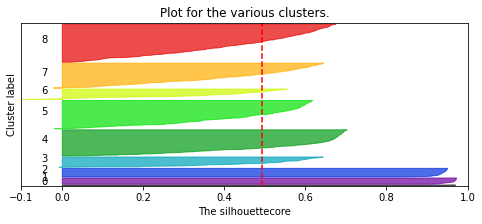

8    411
5    307
4    284
7    270
6    114
3    113
2     94
1     68
0      3
Name: cluster, dtype: int64


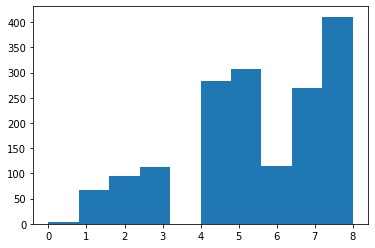

Visualize for  TotalPrice
For n_clusters = 9 the average silhouette score is : 0.4732


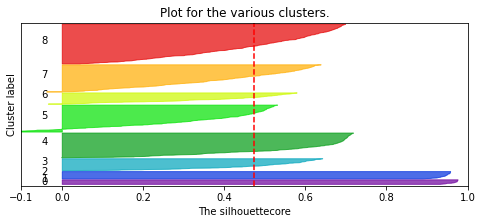

8    429
7    294
5    292
4    268
3    129
6    122
2     79
1     50
0      1
Name: cluster, dtype: int64


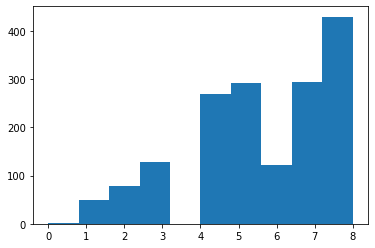

('AvgPricePerInvoice', 'TotalPrice')


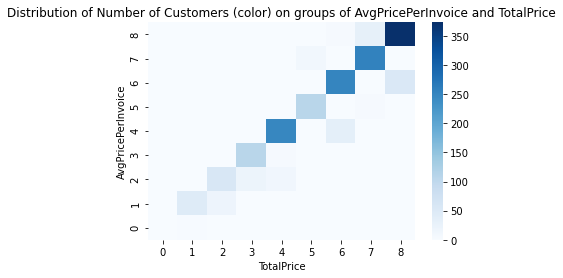

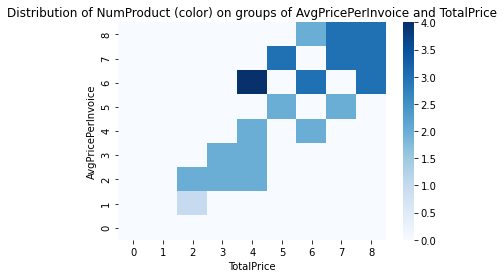

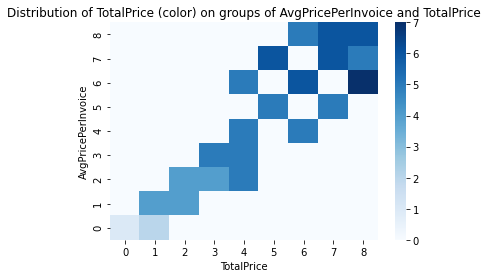

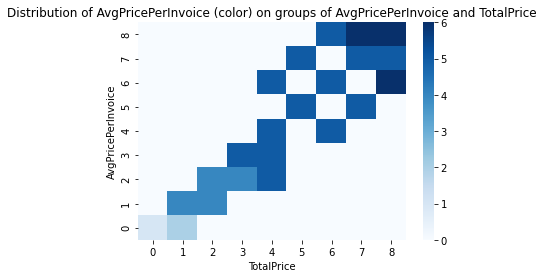

For n_clusters = 9 the average silhouette score is : 0.5724


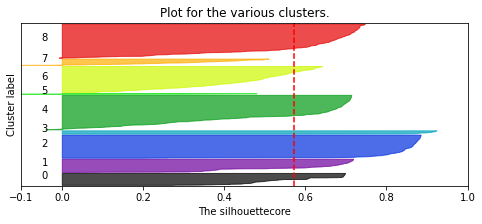

4    374
8    367
6    284
2    251
1    144
0    130
7     70
3     36
5      8
Name: Generic_Cluster, dtype: int64


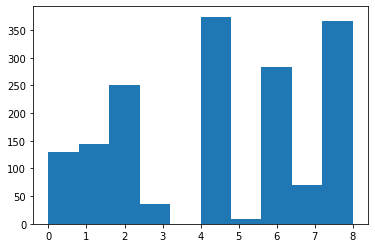

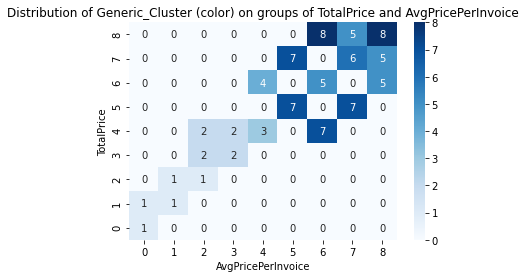

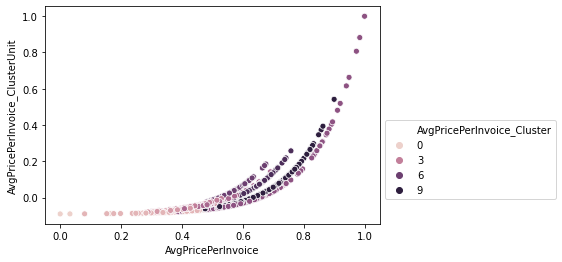

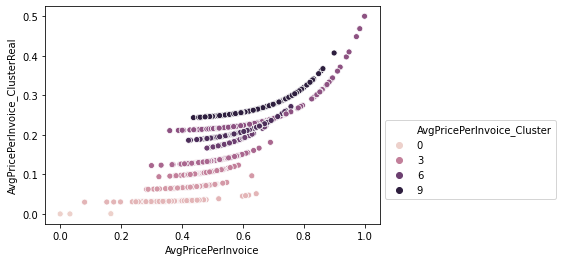

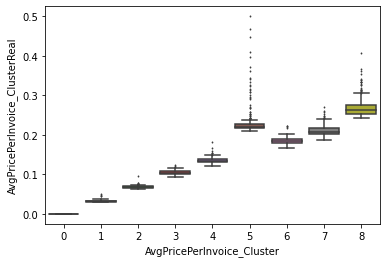

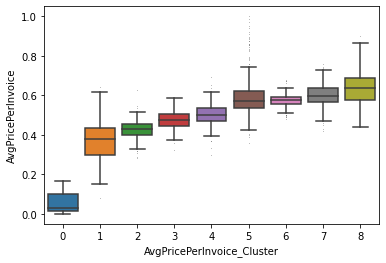

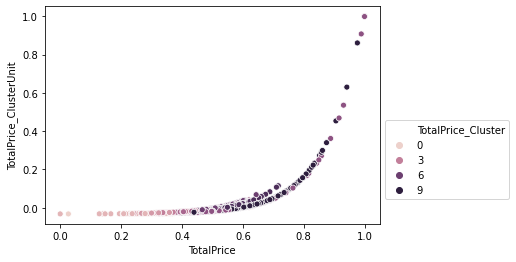

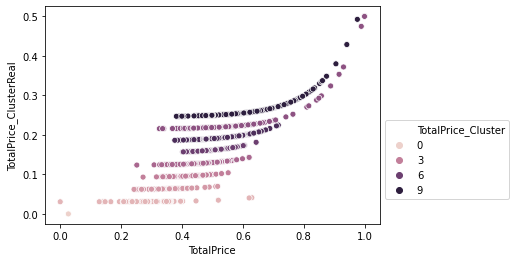

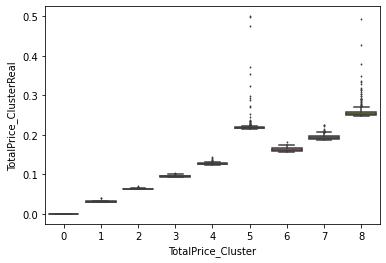

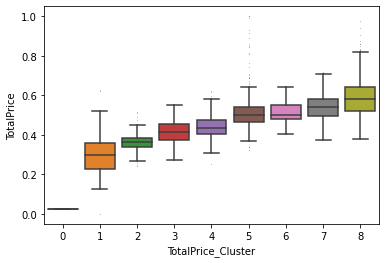

In [32]:
regressor, seg_ana = test(path_name_model=None, path_to_save = 'exp_save/2021_02_18(2)_')